In [1]:
import pandas as pd                              # Import pandas for data manipulation
import numpy as np                               # Import numpy for numerical computations
import seaborn as sns                            # Import seaborn for data visualization
import matplotlib.pyplot as plt                  # Import matplotlib for plotting

import nltk                                      # Import nltk for natural language processing
from nltk.corpus import stopwords                # Import stopwords for text preprocessing
from nltk.tokenize import word_tokenize          # Import word_tokenize for tokenization
from nltk.stem import SnowballStemmer            # Import SnowballStemmer for stemming

import warnings                                  # Import warnings to suppress warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder   # Import LabelEncoder for label encoding

import re                                        # Import re for regular expressions
import collections                               # Import collections for word frequency counting
from wordcloud import WordCloud                  # Import WordCloud for generating word clouds

import folium                                    # Import folium for creating interactive maps

In [2]:
df = pd.read_csv('D:\Imam\Belajar\Python\Data_Science\McDonald-s_Review\McDonald_s_Reviews.csv', sep =',', encoding='latin-1')

In [3]:
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [5]:
df.isna().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df['rating'].unique()

array(['1 star', '4 stars', '5 stars', '2 stars', '3 stars'], dtype=object)

In [8]:
encoder = LabelEncoder()

In [9]:
df['rating'] = encoder.fit_transform(df['rating']) + 1

### Split Data Store_Address

In [10]:
def get_address(address):
    if address == 'By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States':
        return address.split(',')[1]
    else :
        return address.split(',')[0]

def get_city(city):
    if city == 'By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States':
        return city.split(',')[2]
    else :
        return city.split(',')[1]

def get_state(state):
    if state == 'By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States':
        return state.split(',')[3].split(' ')[1]
    else :
        return state.split(',')[2].split(' ')[1]

def get_zipcode(zipcode):
    if zipcode == 'By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States':
        return zipcode.split(',')[3].split(' ')[2]
    else :
        return zipcode.split(',')[2].split(' ')[2]

def get_country(country):
    if country == 'By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States':
        return country.split(',')[4]
    else :
        return country.split(',')[3]
    
df['address'] = df['store_address'].apply(lambda x : get_address(x))
df['city'] = df['store_address'].apply(lambda x : get_city(x))
df['state'] = df['store_address'].apply(lambda x : get_state(x))
df['zipcode'] = df['store_address'].apply(lambda x : get_zipcode(x))
df['country'] = df['store_address'].apply(lambda x : get_country(x))

In [11]:
pd.set_option('display.max_colwidth', None)

### Clean and Tokenize Data

In [12]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Remove special characters and make it lower case
    text = re.sub(r'[^a-zA-ZÀ-ú\s]', '', text.lower())
    
    # Tokenization
    tokens = text.split()
    
    # Remove numbers
    tokens = [token for token in tokens if not token.isdigit()]
    
    # Remove punctuation
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    
    # Remove extra whitespace
    tokens = [token.strip() for token in tokens]
    
    # Remove two letter words
    tokens = [token for token in tokens if len(token) > 2]
    
    # Join the tokens back into a single text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [13]:
df['review'] = [clean_text(text) for text in df.review]

In [14]:
df.zipcode = df.zipcode.astype('int32')                   # Convert the 'zipcode' column to integer type

df.rating_count = df.rating_count.str.replace(',', '')    # Remove commas from the 'rating_count' column
df.rating_count = df.rating_count.astype('int32')         # Convert the 'rating_count' column to integer type

## List 5 Highest rating_count

In [15]:
Highest_rating = [rating for rating, i in df.groupby('rating_count')]
Highest_rating = sorted(Highest_rating, reverse = True)
Highest_rating[:5]

[19682, 19671, 5567, 5566, 5468]

## Word Analysis for the highest rating_count

In [16]:
Data_Highest_1 = df[df['rating_count'] == Highest_rating[0]]
Data_Highest_2 = df[df['rating_count'] == Highest_rating[1]]
Data_Highest_3 = df[df['rating_count'] == Highest_rating[2]]
Data_Highest_4 = df[df['rating_count'] == Highest_rating[3]]
Data_Highest_5 = df[df['rating_count'] == Highest_rating[4]]

## Preprocessing Data

In [17]:
def clean_text(data):
    
    data['clean_text'] = data['review'].apply(str)
    
    # Tokenization
    data['clean_text'] = data['clean_text'].apply(word_tokenize)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    data['clean_text'] = data['clean_text'].apply(lambda x: [word for word in x if word not in stop_words])
    
    # Word normalization
    stemmer = SnowballStemmer('english')
    data['clean_text'] = data['clean_text'].apply(lambda x: [stemmer.stem(word) for word in x])
    
    # Joining the words back into a single text
    data['final_text'] = data['clean_text'].apply(lambda x: ' '.join(x))

## Visualisation Rating

In [18]:
def Rating(data):
    # Assuming your DataFrame is called 'df' and the column is 'rating'
    ratings = data['rating']
    rating_counts = ratings.value_counts().sort_index()
    plt.figure(figsize = (8,6))
    sns.barplot(x=rating_counts.index, y=rating_counts.values)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title('Rating Distribution', fontsize = 12)
    plt.show()

## Visualisation Word

In [19]:
def Graph_Bar(data):
    words = []
    for text in data['final_text']:
        words.extend(text.split())
    word_count = collections.Counter(words)
    top_words = dict(word_count.most_common(10))
    
    # Create the Barplot
    plt.figure(figsize = (8,6))
    plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')
    plt.xticks(range(len(top_words)), list(top_words.keys()))
    # Grid Opacity
    plt.grid(alpha = 0.1)
    # Title
    plt.title('Top 10 most used words', fontsize = 12)
    # Labels
    plt.xlabel('Words')
    plt.ylabel('Frequency')

### Worcloud Word

In [20]:
def Wordcloud(data):
    all_text = ' '.join(data['final_text'])
    
    # Dark Background and figure size
    plt.figure(figsize = (8,6))
    
    # Create the WordCloud object
    wordcloud = WordCloud(width = 1000, height = 600, background_color = 'black').generate(all_text)
    
    # Plot the wordcloud
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title('wordcloud', fontsize = 12)
    plt.show()

## Visualisation for Data_Highest_1

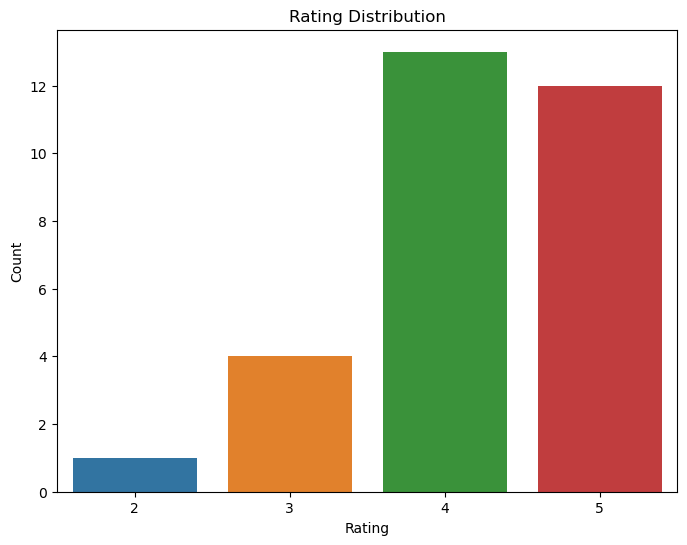

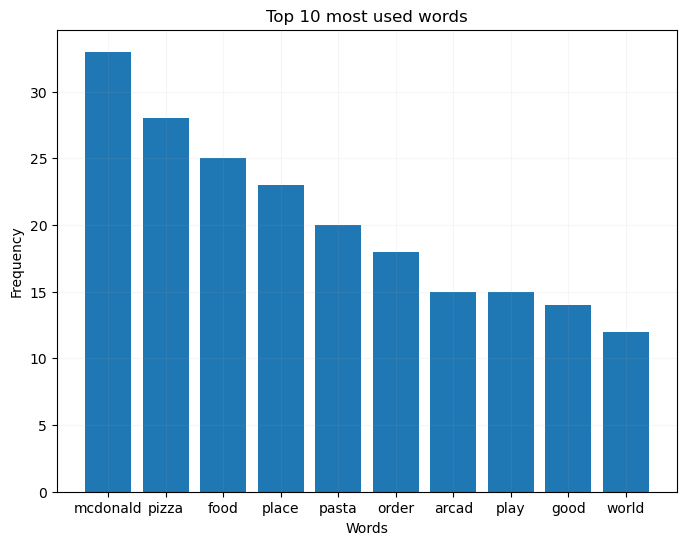

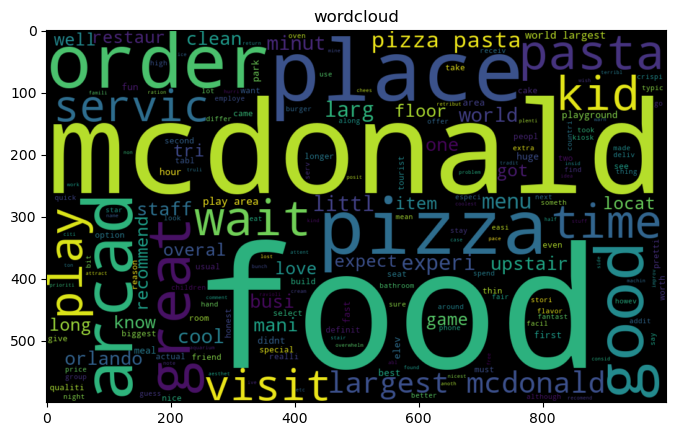

In [21]:
clean_text(Data_Highest_1)
Rating(Data_Highest_1)
Graph_Bar(Data_Highest_1)
Wordcloud(Data_Highest_1)

This store have 0 rating 1, and dominated by rating 4 

## Visualisation for Data_Highest_2

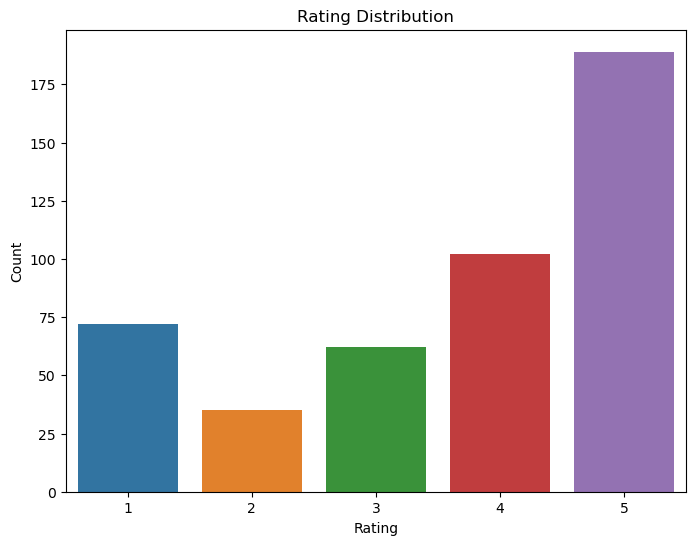

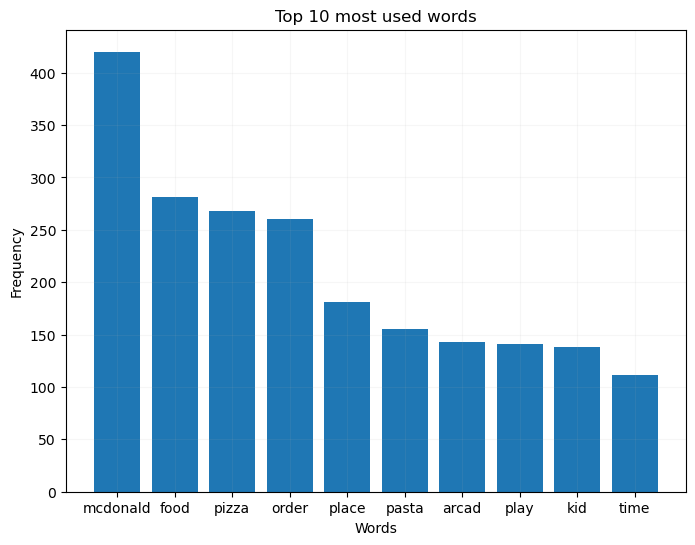

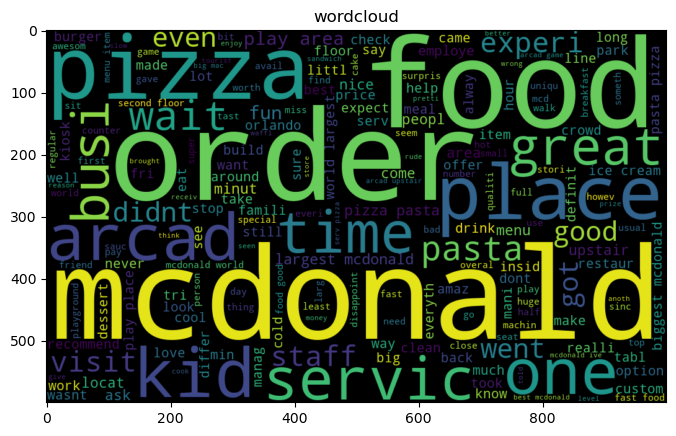

In [22]:
clean_text(Data_Highest_2)
Rating(Data_Highest_2)
Graph_Bar(Data_Highest_2)
Wordcloud(Data_Highest_2)

This store dominated by rating 5

## Visualisation for Data_Highest_3

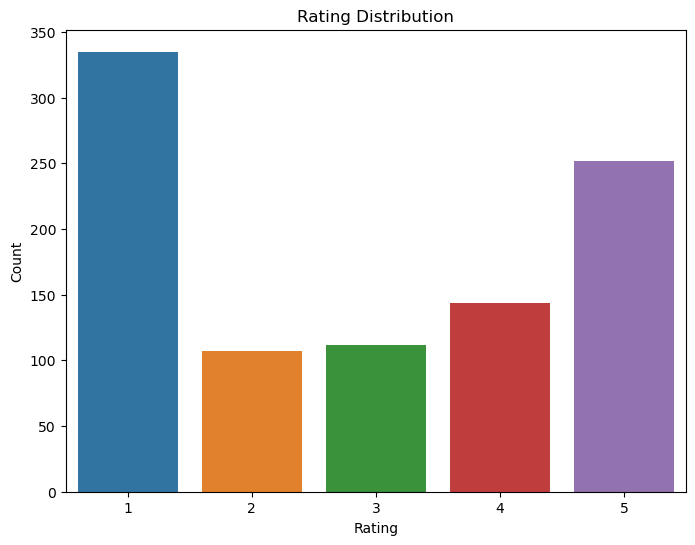

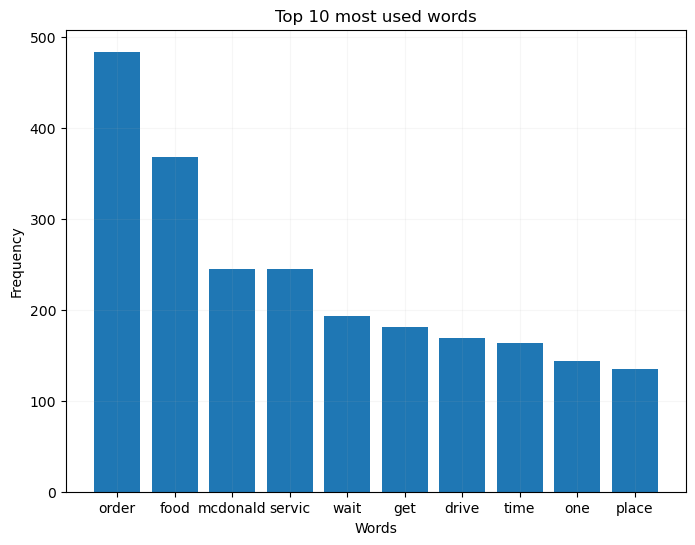

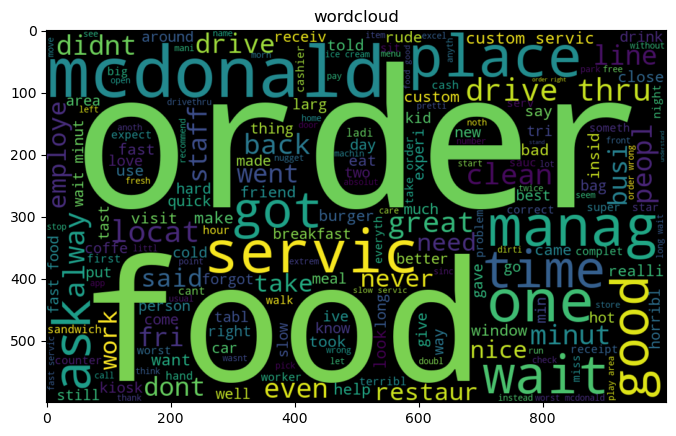

In [23]:
clean_text(Data_Highest_3)
Rating(Data_Highest_3)
Graph_Bar(Data_Highest_3)
Wordcloud(Data_Highest_3)

This store dominated by rating 1

## Visualisation for Data_Highest_4

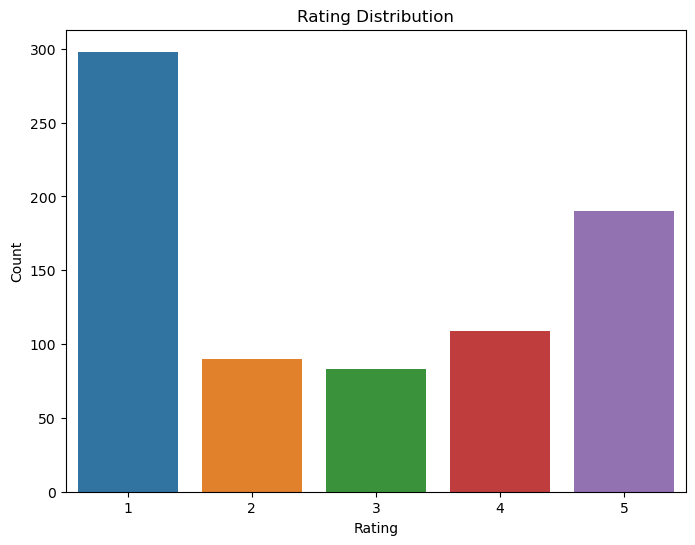

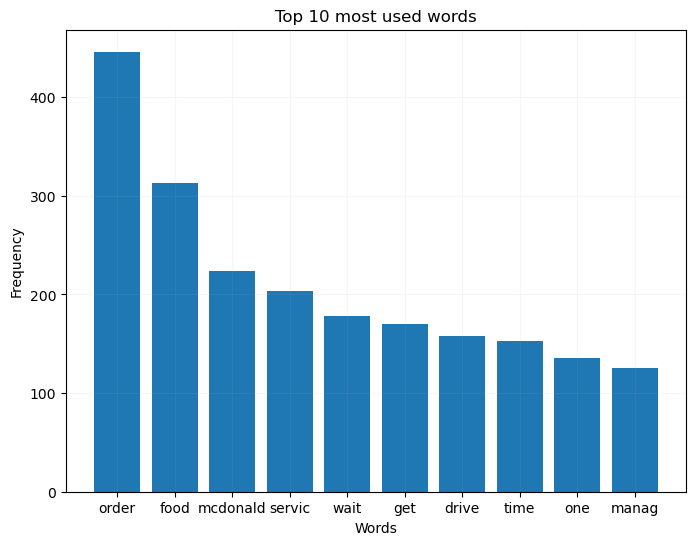

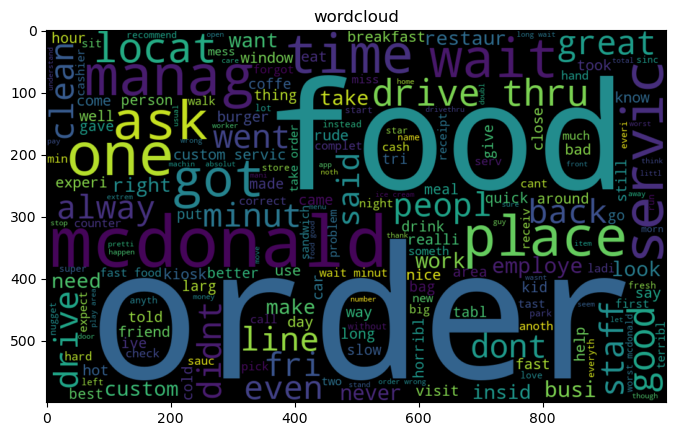

In [24]:
clean_text(Data_Highest_4)
Rating(Data_Highest_4)
Graph_Bar(Data_Highest_4)
Wordcloud(Data_Highest_4)

This store dominated by rating 1

## Visualisation for Data_Highest_5

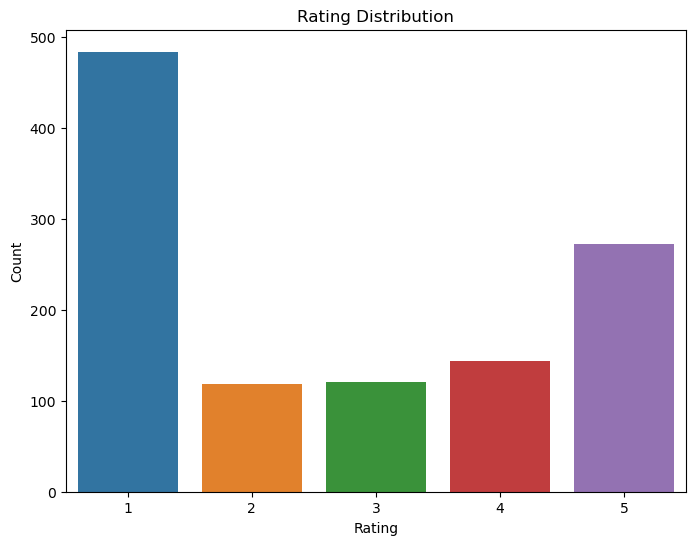

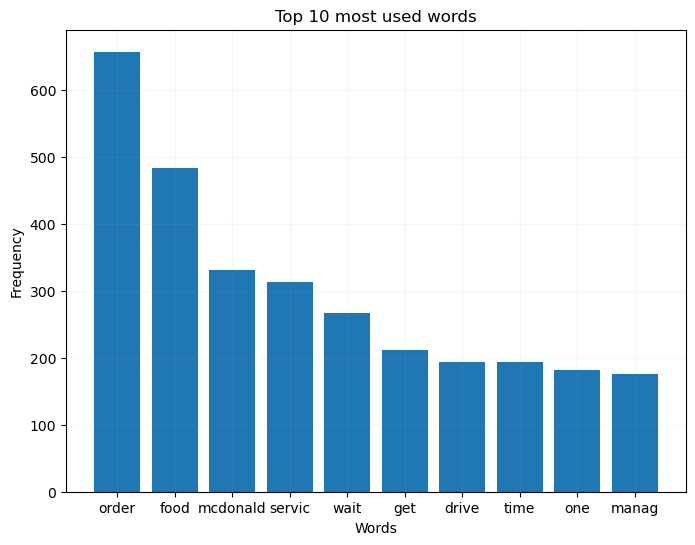

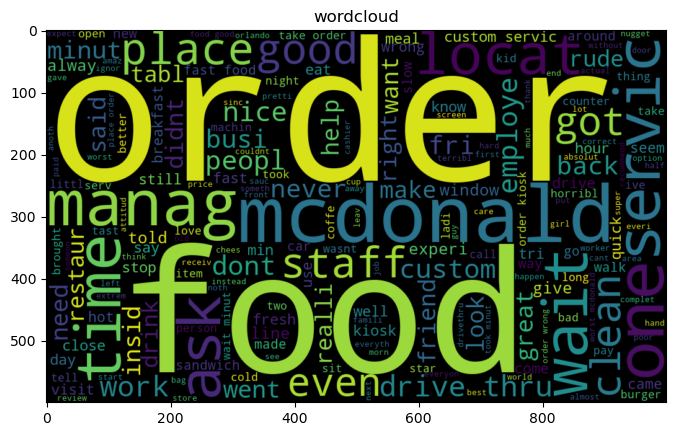

In [25]:
clean_text(Data_Highest_5)
Rating(Data_Highest_5)
Graph_Bar(Data_Highest_5)
Wordcloud(Data_Highest_5)

This store dominated by rating 1

#### Conclusion :
For the highest 1 and highest 2 have good rating and dominated by rating 4 and rating 5 <br>
But, for the highest 3, 4, and 5 dominated by rating 1, which mean this store have bad review

## Visualisation Map

### Create Map which :
for the rating_count > 10000 have color green <br>
for the rating_count > 5000 and < 10000 have color orange <br>
for the rating_count < 5000 have color red <br>

In [26]:
# Create a dataframe using 50 data latitude, longitude, and rating_count
Latitude = np.concatenate((df['latitude '].unique(), df['latitude '].unique()[:11]))
Longitude = np.concatenate((df['longitude'].unique(), df['longitude'].unique()[:11]))
Rating_count = df['rating_count'].unique()

df_map = pd.DataFrame({'Latitude' : Latitude, 'Longitude' : Longitude, 'Rating_count' : Rating_count})

In [27]:
# latitude and longitude center for USA
latitude_center = 39.8283
longitude_center = -98.5795

# Create a map object
map = folium.Map(location=[latitude_center, longitude_center], zoom_start=4)

# Iterate over the DataFrame rows
for index, row in df_map.iterrows():
    # Extract the latitude and longitude values from the DataFrame
    latitude = row['Latitude']
    longitude = row['Longitude']
    Rating_count = row['Rating_count']
    
   # Customize the marker color based on rating_count
    if Rating_count > 10000:
        color = 'green'
    elif Rating_count > 5000:
        color = 'orange'
    else:
        color = 'red'
    
    # Create a marker on the map for each location
    folium.Marker([latitude, longitude], popup=f'Rating Count: {Rating_count}', 
                  icon=folium.Icon(color=color)).add_to(map)
# Display the map
map